# 4장. 가장 훌륭한 예측선

## 파이썬 코딩으로 확인하는 최소 제곱

### 1. 환경 준비

In [1]:
import numpy as np

### 2. 데이터 준비

In [2]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

#### [x와 y의 평균값]

In [3]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


#### [기울기 공식의 분모와 분자]

In [4]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


### 3. 기울기와 y 절편 구하기

In [5]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


## 파이썬 코딩으로 확인하는 평균 제곱 오차

### 1. 환경 준비

In [6]:
import numpy as np

### 2. 데이터 준비

In [7]:
#가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76

#공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

### 3. 평균 제곱 오차 구하기

In [8]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [9]:
# 평균 제곱 오차 함수를 각 y값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 11.0


# 5장. 선형 회귀 모델: 먼저 긋고 수정하기

### 1.환경 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 데이터 준비

In [2]:
#공부 시간 X와 성적 Y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

### 3. 데이터 분포 확인

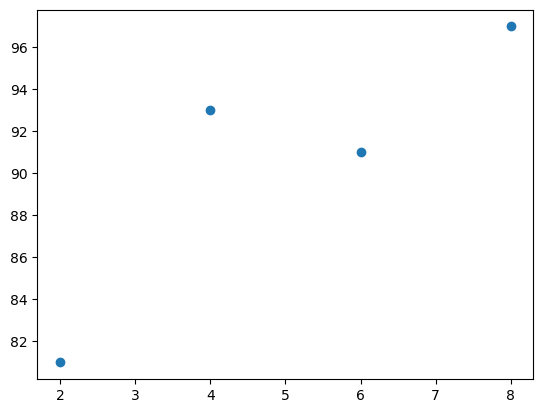

In [3]:
# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [4]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.03

#몇 번 반복될지를 설정합니다. 
epochs = 2001 

### 5. 경사 하강법

In [5]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))     

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


### 6. 그래프 확인 

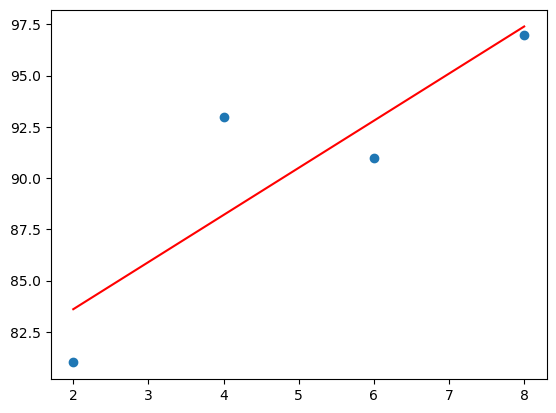

In [6]:
#앞서 구한 최종 a값을 기울기, b값을 y절편에 대입하여 그래프를 그립니다.
y_pred = a * x + b      

#그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

## 파이썬 코딩으로 확인하는 다중 선형 회귀

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 데이터 준비

In [ ]:
#공부 시간 x1과 과외 시간 x2, 그성적 y의 넘파이 배열을 만듭니다. 
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97]) 

### 3. 데이터 분포 확인

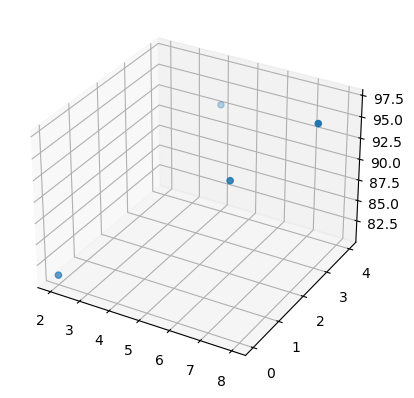

In [ ]:
# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.01

#몇 번 반복될지를 설정합니다.
epochs = 2001 

### 5. 경사 하강법

In [ ]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다. 
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다. 
    
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))
        

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [ ]:
#실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


## 텐서플로에서 실행하는 선형 회귀 모델

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

### 3. 모델 실행

In [ ]:
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다. 
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 402ms/step - loss: 9055.2832
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 2159.2354
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 1141.0547
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 986.2203
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 958.2243
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 948.8915
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 942.3339
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 936.2173
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 930.1991
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 924.2282
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 918.2973
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 912.4051
Epoch 13/2000
1/1 

### 4. 그래프로 확인

1/1 [==============================] - 0s 223ms/step


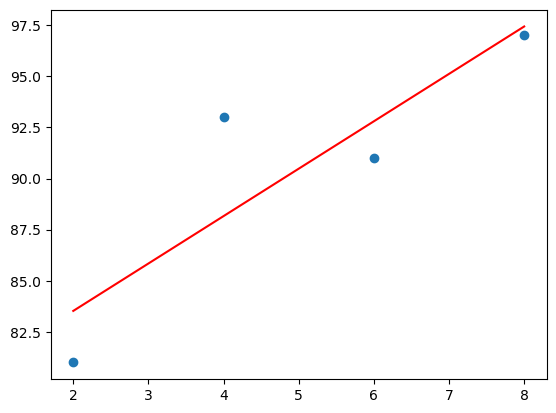

In [ ]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

### 5. 모델 테스트

In [ ]:
#임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))

1/1 [==============================] - 0s 68ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다


## 텐서플로에서 실행하는 다중 선형회귀 모델

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

### 3. 모델 실행

In [ ]:
model = Sequential()

#입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 494ms/step - loss: 7575.4014
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 1394.7935
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 954.6521
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 918.2711
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 910.3209
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 904.4042
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 898.6647
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 892.9712
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 887.3145
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 881.6937
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 876.1084
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 870.5587
Epoch 13/2000
1/1 [=

### 4. 모델 테스트

In [ ]:
#임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 [==============================] - 0s 147ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다
